# Python for Data Analysis

Book:
http://wesmckinney.com/pages/book.html

GitHub:
https://github.com/wesm/pydata-book

## 0. Terminology

* Time series: a series of data points listed in time order
* Data munging/wrangling/munge: transforming messy data into a structured format for processing
* Element-wise: perform on every element (e.g., in an array)
* Quantile: A sample divided into equal-sized parts. E.g., a percentile is a quantile that divides a distribution into 100-equal sized parts.
* Discretization: The process of breaking something down into discrete parts so, e.g., it can be measured/calculated. You might have a formula expressed in terms of time, but you can't measure it for ALL time, since time could theoretically be broken down into an infinite number of parts. So instead you break it down into _discrete_ measurements of 5 seconds, or whatever.
* Binning: Grouping data into bins. For example, instead of having every single age in your survey, you have 18-25, etc.

## 1. Libraries Overview

* NumPy
    * `ndarray` -- fast multidimensional array
    * C interop
    * Linear algebra operations
    * More efficient arrays
    
    
* pandas
    * High-level data structures for working with structured data
    * In particular `DataFrame` and `Series`
    
    
* matplotlib
    * Produces plots and other 2D data visulizations
    
    
* scipi
    * Various scientific computing functions
    * E.g., statistical tests, etc.
    
    
* scikit-learn
    * General-purpose machine learning
    
    
* statsmodels
    * Classical statistics and econometric algorithms
    


## 2. Import conventions
It's bad practice to import everything, like:
`from numpy import *`

This will take in a huge package (snigger).

Instead, the following import conventions are used:

    * `import numpy as np`
    * `import matplotlib.pyplot as plt`
    * `import pandas as pd`
    * `import seaborn as sns`
    * `import statsmodel as sm`
    
This allows you to call, say, `np.arange`, so you can clearly see `.arange` is coming from the `np` package.

## 3. Python Reminder/Tips
This section just contains some points that weren't covered in the previous Python tutorial.

### 3.1 Object Introspection

In [39]:
# Use ? to find out information about an object,
# or to show a function's docstring

my_list = [1, 2, 3]

my_list?

my_list.insert?

### 3.2 %run/%load
Use %run or %load (Jupyter) to run a .py script.

In [10]:
# %run test_script.py

# %load test_script.py

### 3.3 Magic Commands
Magic commands are special IPython commands not available in Python itself.

They are prefixed by %.

E.g., `%timeit`

You can use ? with these commands too.

Use the following to get a list of magic commands:

`%quickref`
`%magic`

In [15]:
# Enter debugger
%debug?

# Delete all defined variables/names
%reset

# Pretty-print the object and display it via pager
%page OBJECT

# Delete a variable and attempt to clear al references to it
%xdel VARIABLE

# Let's you see matplotlibs in Jupyter
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.
Object `OBJECT` not found
NameError: name 'VARIABLE' is not defined
Using matplotlib backend: MacOSX


ERROR:tornado.application:Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x10e7e2f28>)
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback()
  File "/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 265, in enter_eventloop
    self.eventloop(self)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/eventloops.py", line 277, in loop_cocoa
    show.mainloop()
AttributeError: 'function' object has no attribute 'mainloop'


### 3.4 matplotlib in Jupyter

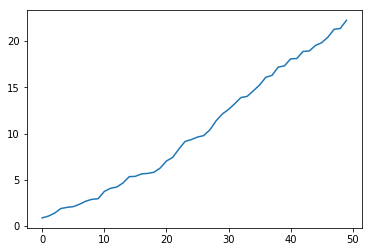

In [17]:
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(np.random.rand(50).cumsum())

### 3.5 Keyword Arguments
Functions can take keyword arguments.

In [22]:
def my_func(x, y, z):
    print("x is {}, y is {}, and z is {}".format(x, y, z))
    
my_func(x=3, z=10, y = 2)

x is 3, y is 2, and z is 10


### 3.6 Binding
Assigning is sometimes referred to as __binding__, and variables that have been assigned may be referred to as __bound variables__.

### 3.7 Checking conformity
As well as using isinstance, you can define a function to check if something implements a certain protocol, throwing an error if it does not.

In [26]:
def isiterable(obj):
    try:
        iter(obj)
        return True
    except TypeError:
        return False

x = 5

if not isinstance(x, list) and isiterable(x):
    x = list(x)
    
print(x)

5


### 3.8 Scalar Value Types
I.e., primitive types

* None
* str
* bytes
* float
* bool
* int

### 3.9 Interpret characters as-is
Use r before the string. (I.e., don't interpret the characters as escape characters.) Like @ in C#.

In [28]:
my_str = r"this string\does not contain\special characters."

print(my_str)

this string\does not contain\special characters.


### 3.10 Printing readable date strings
Use `.strftime(...)`.

In [33]:
from datetime import datetime, date, time

dt = datetime(2017, 1, 21, 20, 30, 21)
dt.strftime('%m/%d/%y %H:%M')

'01/21/17 20:30'

### 3.12 Extracting variables
When unpacking variables, you can use the `*rest` keyword to get the remaining arguments. Note, rest here is just an example and can be anything, such as an underscore (_).

In [35]:
my_list = 1, 2, 3, 4, 5

a, b, *rest = my_list

print(a, b)

print(rest)

1 2
[3, 4, 5]


### 3.13 Sort Keys

In [38]:
my_list = ["he", "ate", "a", "great", "hotdog"]

my_list.sort(key=len)

print(my_list)

['a', 'he', 'ate', 'great', 'hotdog']


### 3.14 Understanding nested comprehension
This is just a nice example.

In [3]:
some_tuples = ((1,2,3),(4,5,6),(7,8,9))

flattened = [x for tup in some_tuples for x in tup]

print(flattened)

# This is the same as:

flattened = []

for tup in some_tuples:
    for x in tup:
        flattened.append(x)
        
print(flattened)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


### 3.15 Using a list of functions to clean strings 

In [8]:
import re

# Just another nice example
def remove_punctuation(str):
    return re.sub("[!#?]", "", str)
                  
                  
def clean_strings(strings, ops):
    result = []
    for value in strings:
        for function in ops:
            value = function(value)
        result.append(value)
    return result
                  
states = ["    alabama", "Georgia!", "West Virginia?  "]
clean_ops = [str.strip, remove_punctuation, str.title]              
    
clean_strings(states, clean_ops)

['Alabama', 'Georgia', 'West Virginia']

### 3.16 itertools
The `itertools` module has a collection for generators, such as groupby, combinations, etc. Similar to LINQ statements in C#.

In [14]:
import itertools

first_letter = lambda x: x[0]

names = ["Adam", "Alan", "Jennifer", "Josie", "James"]

for letter, names in itertools.groupby(names, first_letter):
    print(letter, list(names)) # Names is a generator

('A', ['Adam', 'Alan'])
('J', ['Jennifer', 'Josie', 'James'])


## 2. NumPy Basics

A few points about NumPy:
    
* Data is stored in a contiguous block in memory
* NumPy's algorithms written in C can operate on this without type checking
* NumPy arrays use less memory than built-in Python sequences



In [3]:
# Here's a comparison

import numpy as np

np_array = np.arange(1000000)

python_list = list(range(1000000))


%time for _ in range(10): np_array2 = np_array * 2
    
%time for _ in range(10): python_list2 = [x * 2 for x in python_list]

Wall time: 26 ms
Wall time: 1.13 s


And numpy arrays use less memory too.

### 2.1 ndarray
ndarray is a fast, N-dimensional array object.
You can perform mathematical operations on the every element with similar syntax to that you would use with scalar elements (e.g., above where we could just do `array * 2` to multiply every element in the array by 2, instead of needing a for composition).

Every element in ndarray must be of the same type.

In [4]:
# Here is a 2 by 3 array with random data.

import numpy as np

random_two_by_three = np.random.randn(2, 3)

random_two_by_three

array([[ 1.47636454,  0.58560396,  0.08390403],
       [ 1.39940735, -0.60260737,  0.85310421]])

In [7]:
# I can then multiply every element by 10
random_two_by_three * 10

array([[ 14.76364544,   5.85603959,   0.83904029],
       [ 13.99407348,  -6.02607369,   8.53104209]])

In [8]:
# Or add it with something else, like itself
random_two_by_three + random_two_by_three

array([[ 2.95272909,  1.17120792,  0.16780806],
       [ 2.7988147 , -1.20521474,  1.70620842]])

In [16]:
# Use shape to get the rows/columns of the array
print(random_two_by_three.shape)

# Use ndim to get the dimensions
print(random_two_by_three.ndim)

# And use dtype to get the data type stored in the array
print(random_two_by_three.dtype)

(2L, 3L)
2
float64


#### 2.1.1 Creating ndarrays

In [13]:
# 1. Use the array function
my_data = [1, 2, 3, 4, 5]

my_np_arr = np.array(my_data)

my_np_arr

array([1, 2, 3, 4, 5])

In [15]:
# 2. Nested sequences will be converted into multidimensional arrays
nested_sequence = [[1, 2, 3], [4, 5, 6]]

np_arr = np.array(nested_sequence)

np_arr

array([[1, 2, 3],
       [4, 5, 6]])

In [35]:
# 3. Use other functions like zeros, one, or empty to create arrays with these default values.
#    Pass in tuples with dimensions as arguments.
multi_dim_zero_array = np.zeros((3, 3))

print(multi_dim_zero_array)

identity = np.identity(3) # Note, just a single argument

print(identity)

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [23]:
# 4. arange is like Python's range function, but it passes back an np array instead of a list
aranged_arr = np.arange(10)

aranged_arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
# 5. "like" functions create an ndarray with the same shape and type
nested_sequence = [[1, 2, 3], [4, 5, 6]]
np_arr = np.array(nested_sequence)

print(np_arr)

like_arr = np.ones_like(np_arr)

print(like_arr)

[[1 2 3]
 [4 5 6]]
[[1 1 1]
 [1 1 1]]


In [39]:
# 6. Fill an array FULL of values
filled_arr = np.full((2, 3), 6)

filled_arr

array([[6, 6, 6],
       [6, 6, 6]])

#### 2.1.2 ndarray data types

In [42]:
# 1. Cast an array of strings to floats
number_strings = np.array(["2.64", "1.43", "5.6"], dtype=np.string_)

float_arr = number_strings.astype(float)

float_arr

array([ 2.64,  1.43,  5.6 ])

#### 2.1.3 NumPy array arithmetic
You can perform arithmetic operations on arrays without writing for loops.

In NumPy, this is called __vectorization__. (Specifically, vectorization refers to using some array expression to accomplish your task, instead of writing a for loop.)

In [46]:
arr = np.array([[1, 2, 3,], [4, 5, 6]])

arr

array([[1, 2, 3],
       [4, 5, 6]])

In [49]:
arr * 3

array([[ 3,  6,  9],
       [12, 15, 18]])

In [50]:
arr + arr

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [51]:
arr * arr

array([[ 1,  4,  9],
       [16, 25, 36]])

In [53]:
1.0/arr

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.25      ,  0.2       ,  0.16666667]])

In [54]:
arr ** 0.5

array([[ 1.        ,  1.41421356,  1.73205081],
       [ 2.        ,  2.23606798,  2.44948974]])

In [57]:
# You can also use Boolean operations, which will compare each element in the array
arr2 = np.array([[1, 5, 2], [2, 7, 9]])

arr2 < arr

array([[False, False,  True],
       [ True, False, False]], dtype=bool)

#### 2.1.4 Indexing and slicing
If you take a slice of an array and assign a scalar value to it, this is known as __broadcasting__. The value is __broadcasted__ to that slice.

In [59]:
# Broadcasting example
arr = np.arange(10)

arr[4:6] = 9

arr

array([0, 1, 2, 3, 9, 9, 6, 7, 8, 9])

Important difference:
When you take a slice of an ndarray, the slice refers to the original array elements.
The data is NOT copied.

This slice is known as a __view__.

In [69]:
arr = np.arange(10)

# Take a slice
my_slice = arr[0:5]

print(my_slice)

# Change the first element of my slice
my_slice[0] = 10

# The change is reflected in the original array
print(arr)

# Or we could change every value in this slice
my_slice[:] = 1

print(arr)

[0 1 2 3 4]
[10  1  2  3  4  5  6  7  8  9]
[1 1 1 1 1 5 6 7 8 9]


In [70]:
# But if you want, you CAN take a copy too.
my_slice = arr[8:10].copy()

my_slice[:] = 0

print(my_slice)
print(arr)

[0 0]
[1 1 1 1 1 5 6 7 8 9]


In [74]:
# 2D arrays can be accessed using the usual [][] syntax, or by commas
arr = np.array([[1, 2, 3], [4, 5, 6]])

print(arr)

print(arr[0][1]) # ==
print(arr[0, 1])

[[1 2 3]
 [4 5 6]]
2
2


In [79]:
# Note on multidimensional arrays.
# We can also get, say, 2 x 2 x 3 arrays. This means an 2 (2 by 3) arrays.
higher_dim_arr = np.array([[[1, 2, 3], [4, 5, 6]], [[3, 2, 1], [6, 5, 3]]])

print(higher_dim_arr)

# So calling just one index will get you the first array
print(higher_dim_arr[0])

# And you can assign values to just this
higher_dim_arr[0] = 1

print(higher_dim_arr)

[[[1 2 3]
  [4 5 6]]

 [[3 2 1]
  [6 5 3]]]
[[1 2 3]
 [4 5 6]]
[[[1 1 1]
  [1 1 1]]

 [[3 2 1]
  [6 5 3]]]


#### Slicing in 2D
Slicing in 2D is pretty logical. You just have to remember the syntax.

In [83]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(arr2d)

slice2d = arr2d[:2] # Take first 2 rows (up to row index at 2 -- the 3rd row)

print(slice2d)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]]


In [90]:
# First arg = select all rows, second arg: select up to column 1
col1 = arr2d[:, :1]
print(col1)

# Take from row 1, up to col 2 (the third col)
sub_arr = arr2d[1:, :2]
print(sub_arr)

[[1]
 [4]
 [7]]
[[4 5]
 [7 8]]


#### 2.1.5 Boolean indexing
We can use a Boolean condition to select array indices.

Suppose we had some names and an array of data.
And imagine every row in the array corresponds to one of the names.

In [92]:
# Array of names
names = np.array(["Bob", "James", "Tim", "Sally", "Trish", "Sara", "Jesse"])

data = np.random.randn(7, 4)

print(names)
print(data)

['Bob' 'James' 'Tim' 'Sally' 'Trish' 'Sara' 'Jesse']
[[-0.74976441 -1.44286506 -0.49599846 -1.28430698]
 [ 0.21163118 -0.31702432  1.02055599  0.12360032]
 [ 0.02082039 -1.94356852 -0.92712085  0.57247121]
 [ 1.85835009  1.66578352  0.50968336  1.26967872]
 [-0.42728919 -1.88049417  1.26696286 -0.00519333]
 [-0.74430498  2.00097006 -0.10675513  0.72826767]
 [-1.41578149  1.30536751  0.12695225 -1.89775707]]


In [94]:
# We can then get the elements/index of the array that correspond to a certain name
# I.e., the True is in index 2, where Tim is.
names == "Tim"

array([False, False,  True, False, False, False, False], dtype=bool)

In [96]:
# So, we can pass this into data, to get Tim's corresponding row
# I.e., get the index of names that corresponds to Tim, and then pass this into data
data[names == "Tim"]

array([[ 0.02082039, -1.94356852, -0.92712085,  0.57247121]])

In [98]:
# You could also combine this to get a certain column/columns with slicing
data[names == "Tim", 3]

array([ 0.57247121])

In [100]:
# Likewise, you can negate the condition using != or ~ to get everything EXCEPT Tim's data
data[~(names == "Tim")]

array([[-0.74976441, -1.44286506, -0.49599846, -1.28430698],
       [ 0.21163118, -0.31702432,  1.02055599,  0.12360032],
       [ 1.85835009,  1.66578352,  0.50968336,  1.26967872],
       [-0.42728919, -1.88049417,  1.26696286, -0.00519333],
       [-0.74430498,  2.00097006, -0.10675513,  0.72826767],
       [-1.41578149,  1.30536751,  0.12695225, -1.89775707]])

__Note:__ `and` and `or` won't work with Boolean indexing. Using `&` and `|` instead:

In [102]:
data[(names == "Tim") | (names == "Sara")]

array([[ 0.02082039, -1.94356852, -0.92712085,  0.57247121],
       [-0.74430498,  2.00097006, -0.10675513,  0.72826767]])

__Note:__ Selecting array elements using Boolean conditionals ALWAYS creates a copy of the data.

In [105]:
# We can also use Boolean conditionals to set data
# E.g., floor to 0
data[data < 0] = 0

print(data)

[[ 0.          0.          0.          0.        ]
 [ 0.21163118  0.          1.02055599  0.12360032]
 [ 0.02082039  0.          0.          0.57247121]
 [ 1.85835009  1.66578352  0.50968336  1.26967872]
 [ 0.          0.          1.26696286  0.        ]
 [ 0.          2.00097006  0.          0.72826767]
 [ 0.          1.30536751  0.12695225  0.        ]]


In [107]:
# Or to set values for a user
data[names == "Tim"] = 7

print(data)

[[ 0.          0.          0.          0.        ]
 [ 0.21163118  0.          1.02055599  0.12360032]
 [ 7.          7.          7.          7.        ]
 [ 1.85835009  1.66578352  0.50968336  1.26967872]
 [ 0.          0.          1.26696286  0.        ]
 [ 0.          2.00097006  0.          0.72826767]
 [ 0.          1.30536751  0.12695225  0.        ]]


#### 2.1.6 Fancy indexing
_fancy indexing_ refers to indexing using an integer array.

Fancy indexing will always return a 1D array.

Like Boolean indexing, fancy indexing will always create a copy of the data.

In [110]:
# Take an array like this:
arr = np.empty((8,4))

for i in range(8):
    arr[i] = i
    
print(arr)

[[ 0.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 2.  2.  2.  2.]
 [ 3.  3.  3.  3.]
 [ 4.  4.  4.  4.]
 [ 5.  5.  5.  5.]
 [ 6.  6.  6.  6.]
 [ 7.  7.  7.  7.]]


In [112]:
# Then we can use fancy indexing to select a subset of rows in a particular order.
# E.g., to select 6 and 3:
subset = arr[[6, 3]]

print(subset)

[[ 6.  6.  6.  6.]
 [ 3.  3.  3.  3.]]


In [113]:
# reshape -- change the dimension of an array
arr = np.arange(32).reshape((8, 4))

print(arr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


In [117]:
# If you pass in two arrays, you get back a 1D array where the first array specifies the row, and the second the column.
arr1d = arr[[0, 7], [3, 0]]

# 3 = [0,3]
# 4 = [7,0]
print(arr1d)

[ 3 28]


#### 2.1.7 Transposing
Arrays have a `transpose` method and a `T` attribute.

In [154]:
arr = np.arange(15).reshape(3, 5)

print(arr)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [148]:
# Get the transpose
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [149]:
# Just accessing the parameter doesn't affect the underlying array, obviously.
print(arr)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [157]:
# Higher dimension arrays can also be transposed
# (2 2x4 matrices)
arr = np.arange(16).reshape(2, 2, 4)
print(arr)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


In [158]:
# Swap the axes within the arrays
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

In [159]:
print(arr)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


In [161]:
# Transpose is a bit more complex in higher dimensions
arr = np.arange(16).reshape(2, 2, 4)
print(arr)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


In [163]:
# Here, we feed in how we want to permute the axes.
# For example, if we think of our axes as (x, y, z). I.e., the x = matrix to choose, y = row to choose, z = column to choose
# Then, (0, 1, 0) = 4 in our original matrix.
# Now, into transpose we pass (1, 0, 2). It's like saying, make (x, y, z) into (y, x, z)
# So (0, 1, 0) = 4, means 4 changes to position (1, 0, 0) -- second matrix, first row, first col.
# Whew!
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

### 2.2 Universal functions
Aka `ufunc`.

These functions vectorize -- perform some operation on all of the elements without needing a for loop -- on all the elements in an array.

There are two types:

* Unary functions: operate on one array
* Binary functions: operate on two arrays

List of available ufuncs: https://docs.scipy.org/doc/numpy-1.13.0/reference/ufuncs.html#available-ufuncs

In [165]:
arr = np.arange(10)
print(arr)

[0 1 2 3 4 5 6 7 8 9]


In [166]:
np.sqrt(arr)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

In [168]:
np.exp(arr)

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

In [169]:
x = np.array([1, 2, 4])

y = np.array([3, 1, 2])

np.maximum(x, y)

array([3, 2, 4])

In [174]:
# Ufuncs can take an out parameter to operate on the array in-place

arr = np.array([1.0, 2.0, 3.0])
np.sqrt(arr)

print(arr)

np.sqrt(arr, arr)
print(arr)

[ 1.  2.  3.]
[ 1.          1.41421356  1.73205081]


### 2.3 Array-Oriented Programming
With NumPy, we can often replace for loops with some concise array expression.
In other words, we can perform _vectorization_ -- replacing for loops with some array expression.

In [198]:
# To look at this example, we must understand meshgrid.
# Meshgrid takes 2 1D arrays and turns them into a grid.
# This would be a 10x5 grid.
x_points = np.arange(10)
y_points = np.arange(5)

print(x_points)
print(y_points)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4]


In [199]:
# Get all the x points and y points
xs, ys = np.meshgrid(x_points, y_points)

In [200]:
# 5 rows of 10 dots (5 = y dimension)
xs

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [201]:
# 10 columns of 5 dots (10 = x dimension)
ys

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]])

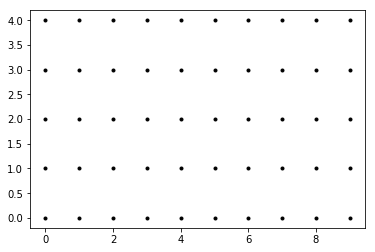

In [192]:
# If we draw it, it looks like this:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xs,ys, marker='.', color='k', linestyle='none')

In [204]:
# Now, if we wanted to find sqrt(x^2 + y^2), we just do:
z = np.sqrt(xs^2 + ys^2)

print(z)

# The point is, we did it all using array operations -- there were no for loops.

[[ 0.          1.          1.41421356  1.73205081  2.          2.23606798
   2.44948974  2.64575131  2.82842712  3.        ]
 [ 1.          0.          1.73205081  1.41421356  2.23606798  2.
   2.64575131  2.44948974  3.          2.82842712]
 [ 2.44948974  2.64575131  2.          2.23606798  1.41421356  1.73205081
   0.          1.          3.74165739  3.87298335]
 [ 2.64575131  2.44948974  2.23606798  2.          1.73205081  1.41421356
   1.          0.          3.87298335  3.74165739]
 [ 2.          2.23606798  2.44948974  2.64575131  0.          1.
   1.41421356  1.73205081  3.46410162  3.60555128]]


In [207]:
# The where condition can be used to get filtered data
x_arr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
y_arr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

conditions = np.array([True, True, False, False, True])

# If True, take from x_arr, else, take from y_arr
result = np.where(conditions, x_arr, y_arr)

result

array([ 1.1,  1.2,  2.3,  2.4,  1.5])

In [210]:
# Another where example: imagine we wanted everything -ve to be -2, and everything +ve to be 2.

arr = np.random.randn(4, 4)
arr

array([[-0.72923974, -2.03837278, -0.96654509,  1.7903514 ],
       [ 0.82098975, -0.24916209, -0.28642331,  0.99524732],
       [ 2.27167346, -1.06800021,  0.15132695,  1.17992048],
       [-0.86194962, -1.3309561 , -0.66236043, -1.05764893]])

In [211]:
result = np.where(arr > 0, 2, -2)

result

array([[-2, -2, -2,  2],
       [ 2, -2, -2,  2],
       [ 2, -2,  2,  2],
       [-2, -2, -2, -2]])

In [212]:
# What if I only wanted to replace the positive values, and leave the rest alone?
# In this case, we can just pass in the array to the "else" part of the statement
arr = np.random.randn(4, 4)
arr

array([[ -2.62141956e-01,   3.63206390e-01,   1.58499414e-03,
         -8.20037558e-01],
       [ -5.20998062e-01,   1.38604317e+00,   3.56671927e-02,
          9.88523190e-01],
       [ -2.24099800e-02,   6.25422700e-01,  -6.15655484e-01,
         -1.50033677e+00],
       [  3.85942154e-01,   6.82148328e-01,   2.17148487e+00,
         -1.91187563e-01]])

In [213]:
result = np.where(arr > 0, 2, arr)
result

array([[-0.26214196,  2.        ,  2.        , -0.82003756],
       [-0.52099806,  2.        ,  2.        ,  2.        ],
       [-0.02240998,  2.        , -0.61565548, -1.50033677],
       [ 2.        ,  2.        ,  2.        , -0.19118756]])

#### 2.3.1 Mathematical & statistical methods

In [214]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [215]:
arr.mean()

4.5

In [216]:
arr.sum()

45

In [218]:
arr = np.arange(9).reshape(3, 3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [221]:
# Supply an axis argument to get the sum of each row in another, 1D, array
arr.sum(axis=1)

array([ 3, 12, 21])

In [223]:
# Or we could do axis=0 to sum the columns
arr.sum(axis=0)

array([ 9, 12, 15])

Slightly confusing reversal of the row/column standard. For clarity:

* `axis=0` == compute down the rows (i.e., the columns)
* `axis=1` == computer across the columns (i.e., the rows)

#### 2.3.2 Sorting
You can sort an axis of a multdimensional array by passing an axis into sort.

In [224]:
arr = np.random.randn(4, 4)
arr

array([[ 0.67985615,  0.4467615 ,  0.98179096,  0.89242437],
       [ 0.0086968 ,  0.9241127 ,  0.59112928,  0.93030476],
       [ 0.82821186,  0.38144211,  0.23559007,  1.36495571],
       [ 0.30221386,  0.12111979, -0.25221855,  0.22984603]])

In [227]:
# Sort across the columns
arr.sort(1)
arr

array([[ 0.4467615 ,  0.67985615,  0.89242437,  0.98179096],
       [ 0.0086968 ,  0.59112928,  0.9241127 ,  0.93030476],
       [ 0.23559007,  0.38144211,  0.82821186,  1.36495571],
       [-0.25221855,  0.12111979,  0.22984603,  0.30221386]])

In [228]:
arr = np.random.randn(4, 4)
arr

array([[ 0.51275434, -0.39658362, -0.18785255,  0.78905677],
       [ 0.18243359, -0.10371522,  0.41654519, -1.25773565],
       [-0.2898797 , -1.60171387, -0.19392922, -1.61828443],
       [ 0.65298619, -1.42323186, -1.90427449, -1.56585265]])

In [230]:
# Sort down the rows
arr.sort(0)
arr

array([[-0.2898797 , -1.60171387, -1.90427449, -1.61828443],
       [ 0.18243359, -1.42323186, -0.19392922, -1.56585265],
       [ 0.51275434, -0.39658362, -0.18785255, -1.25773565],
       [ 0.65298619, -0.10371522,  0.41654519,  0.78905677]])

#### 2.3.3 Unique & Other set logic

In [232]:
# np.unique returns the sorted, unique values in an array.
names = np.array(["Tim", "Bob", "Bob", "Stewart", "Linda", "Steven", "Sara", "Alberta", "Steven"])

result = np.unique(names)

result

array(['Alberta', 'Bob', 'Linda', 'Sara', 'Steven', 'Stewart', 'Tim'],
      dtype='|S7')

In [233]:
# in1d tells you if the element belongs to some other array
arr = np.array([1, 0, 0, 7, 21, 5, 3, 2, 21])

np.in1d(arr, [7, 3, 1])

array([ True, False, False,  True, False, False,  True, False, False], dtype=bool)

### 2.4 Linear Algebra

In [8]:
import numpy as np

x = np.array([[2, 2,], [2, 2]])
y = np.array([[1, 2], [3, 4]])

print(x)
print(y)

[[2 2]
 [2 2]]
[[1 2]
 [3 4]]


In [10]:
# Unlike some languages, * performs ELEMENT-WISE multiplication -- not matrix multiplication as we know it.
# In other words, element (0, 0) in matrix x is multiplied by element (0, 0) in matrix y, etc.
x * y

array([[2, 4],
       [6, 8]])

In [12]:
# This performs matrix multiplication. Note, it's not a dot product, just a dot.
# I.e., the rows of x * cols of y
x.dot(y)

array([[ 8, 12],
       [ 8, 12]])

`numpy.linalg` can calculate matrix decompositions, inverse, determinant, etc. 

In [13]:
from numpy.linalg import inv, qr

In [26]:
x = np.array([[4, 7], [2, 6]])
x

array([[4, 7],
       [2, 6]])

In [30]:
# Reminder: The inverse is like the reciprocal for matrices.
# As we can multiply 8 * 1/8 to get 1, we multiply matrix A by its inverse to get I, the identity matrix. 
my_inv = inv(x)
my_inv

array([[ 0.6, -0.7],
       [-0.2,  0.4]])

In [34]:
my_inv.dot(x)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [37]:
# qr decompositon returns q = orthonormal, r = upper-triangle
x = np.random.randn(4, 4)
x

array([[ 0.93872419, -0.67983241,  0.43534016,  1.27334021],
       [ 0.51130548,  0.03496489,  0.14910232, -0.21279254],
       [-0.80673439,  1.30315786, -0.00311249,  0.27066436],
       [ 0.36980251,  0.37070423, -1.92163132, -0.60319632]])

In [39]:
q, r = qr(x)

# Reminder: orthonormal matrix = columns and rows are orthonormal vectors
#           orthogonal = all meet at 90 degrees, normal = length 1 = orthonormal
#           Makes it easier to find in terms of another basis, projection, etc.
q

array([[-0.67567158, -0.06396886, -0.38416518,  0.62593371],
       [-0.36802565, -0.42496319, -0.43149768, -0.70553041],
       [ 0.58066843, -0.63708777, -0.39242682,  0.32084972],
       [-0.26617514, -0.63986987,  0.7157011 ,  0.08654065]])

In [41]:
# Reminder: upper-triangle = only upper-right has values
#           upper-triangles let us use a trick -- we can just multiply down the diagonal to get a determinant
r

array([[-1.38932022,  1.10450584,  0.16066271, -0.46432457],
       [ 0.        , -1.03879909,  1.1403657 ,  0.22250507],
       [ 0.        ,  0.        , -1.60567205, -0.9352777 ],
       [ 0.        ,  0.        ,  0.        ,  0.98179976]])

### 2.5 Random numbers
`numpy.random` lets you generate arrays of random numbers with a given probability distribution.
It is also faster than Python's standard random-number generation for large sample generation.

In [43]:
# Normal distribution
normally_distributed_data = np.random.normal(size=(4, 4))

normally_distributed_data

array([[-0.48456418,  0.16150928, -0.59184648,  0.51013253],
       [ 1.01326564, -0.03618413, -0.20496228,  0.09087592],
       [ 0.39911377,  0.69558163, -1.77498029, -1.03743202],
       [ 0.1872146 , -0.35207145, -0.82949099, -2.22455098]])

In [44]:
# Change the seed
np.random.seed(123)

In [49]:
# numpy.random uses a global random seed. Use numpy.random.RandomState to create a generator
# isolated from others.
rng = np.random.RandomState(123)

rng.randn(10)

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025,
        1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ])

#### 2.5.1 Example: Random Walk
Reminder: a random walk is a sequence of random steps in some space, such as the integers.
For example, a random walk along the integer line might start at 0, and then take a step of -1 or +1 every time.

Here is an example of simulating a random walk such as this in numpy.

In [52]:
steps = 1000
random_values = np.random.randint(0, 2, size=steps)
# Get 1000 random values of 0 or 1
random_values

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0,

In [54]:
# Get all the steps we'll take on our walk
steps = np.where(random_values > 0, 1, -1)
steps

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1,
        1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,
       -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
       -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1,
       -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,
        1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1,  1,  1, -1, -1

In [57]:
# Get the walk itself
walk = steps.cumsum()
walk

array([  1,   2,   3,   4,   5,   4,   5,   6,   7,   6,   7,   6,   5,
         6,   7,   6,   7,   6,   7,   8,   9,  10,   9,   8,   7,   8,
         7,   8,   7,   8,   7,   8,   7,   6,   7,   8,   7,   6,   7,
         6,   5,   4,   5,   4,   5,   6,   7,   6,   7,   8,   9,  10,
        11,  12,  13,  12,  13,  12,  13,  14,  15,  16,  17,  16,  15,
        16,  17,  18,  17,  18,  19,  20,  19,  20,  19,  18,  19,  20,
        19,  20,  19,  20,  21,  22,  23,  24,  25,  24,  25,  24,  25,
        24,  23,  22,  21,  22,  23,  22,  23,  24,  25,  24,  23,  22,
        23,  22,  23,  22,  21,  20,  19,  18,  19,  20,  19,  18,  17,
        18,  19,  18,  17,  18,  19,  18,  19,  20,  21,  22,  21,  22,
        23,  22,  21,  20,  19,  20,  19,  18,  17,  16,  15,  16,  17,
        18,  17,  16,  17,  18,  17,  16,  17,  16,  17,  16,  15,  16,
        15,  14,  13,  14,  13,  12,  11,  12,  13,  14,  15,  14,  13,
        14,  15,  14,  15,  16,  17,  16,  17,  16,  17,  16,  1

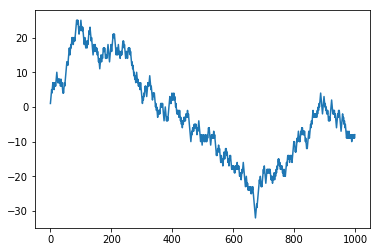

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(walk)

In [59]:
walk.min()

-32

In [60]:
walk.max()

25

In [61]:
# We might also want to calculate FIRST CROSSING TIME -- how many steps it took to reach a particular value
# We can use argmax() -- when it first reached this value
# For example, to work out when we first got 10 steps away:
(np.abs(walk) >= 10).argmax()

21

In [70]:
# Now, say we wanted to take 5000 walks...
num_of_walks = 5000
steps_per_walk = 1000

# This will give us 5000 rows, each with 1000 random numbers in it (i.e., 1000 columns)
random_values = np.random.randint(0, 2, size=(num_of_walks, steps_per_walk))

print(random_values.shape)

# Calculate the steps like normal
steps = np.where(random_values > 0, 1, -1)

# Calculate the cumulative sum across the columns (e.g., rows -- calculate the values for each walk)
walks = steps.cumsum(1)

print(walks)

(5000L, 1000L)
[[  1   2   3 ...,  38  37  38]
 [  1   0   1 ..., -16 -17 -16]
 [ -1   0  -1 ...,  42  41  42]
 ..., 
 [ -1  -2  -3 ...,  20  19  20]
 [  1   0   1 ..., -46 -45 -46]
 [  1   0   1 ...,  26  27  26]]


In [71]:
# Now we can compute the max and min over 5000 walks!
walks.min()

-128

In [72]:
walks.max()

126

In [74]:
# Find out how many walks reach 30
hit_30 = (np.abs(walks) >= 30).any(1)
hit_30

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [75]:
hit_30.sum()

3351

In [77]:
# Now get the crossing times using Boolean indexing with the array above and our argument from before
crossing_times = (np.abs(walks[hit_30]) >= 30).argmax(1)
crossing_times

array([195, 711, 425, ..., 703, 561, 305], dtype=int64)

In [78]:
# Then get the mean
crossing_times.mean()

502.8382572366458

## 3. pandas
Data structures and manipulation libraries.
NumPy = homogenous, numerical array data
pandas = tabular or heterogeneous data

In [79]:
# Import conventions
import pandas as pd
from pandas import Series, DataFrame

### 3.1 Series
A 1D array-like object.
Contains a list of values and associated array of labels.
This array of labels is called its __index__.

In [80]:
simple_series = pd.Series([5, 9, 2, 5])

simple_series

0    5
1    9
2    2
3    5
dtype: int64

In [81]:
simple_series.values

array([5, 9, 2, 5], dtype=int64)

In [82]:
simple_series.index

RangeIndex(start=0, stop=4, step=1)

In [84]:
# You can specify your own index too
series_with_index = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])

series_with_index

a    1
b    2
c    3
d    4
dtype: int64

In [85]:
# You can then access elements using this custo index
series_with_index["b"]

2

In [86]:
series_with_index["a"] = 9

series_with_index

a    9
b    2
c    3
d    4
dtype: int64

In [87]:
series_with_index[["a", "d"]]

a    9
d    4
dtype: int64

In [88]:
# Mathematical operations won't affect the index-value relationship
series_with_index[series_with_index>2]

a    9
c    3
d    4
dtype: int64

In [89]:
series_with_index*2

a    18
b     4
c     6
d     8
dtype: int64

In [90]:
series_with_index

a    9
b    2
c    3
d    4
dtype: int64

In [91]:
# Series is kind of like a fixed-length, ordered dictionary. You can check if it contains a value.
"d" in series_with_index

True

In [92]:
"z" in series_with_index

False

In [95]:
# Therefore, you can create a series from a Python dictionary
data_dict = {"Name": "Graham", "Age": "23", "Language": "Python"}

series_from_dict = pd.Series(data_dict)
# Note, when the series is generated, the keys are stored in sorted order
series_from_dict

Age             23
Language    Python
Name        Graham
dtype: object

In [97]:
# You could also pass in a dictionary and ANOTHER index as a list, which will cause
# the keys to be in that list order instead
data_index = ["Name", "Age", "Height"]

series_from_dict = pd.Series(data_dict, index=data_index)
series_from_dict

Name      Graham
Age           23
Height       NaN
dtype: object

In [98]:
# Notice height is missing, since it did not appear in the original dictionary.
# You can check missing values like this:
pd.isnull(series_from_dict)

Name      False
Age       False
Height     True
dtype: bool

In [99]:
# Or the inverse:
pd.notnull(series_from_dict)

Name       True
Age        True
Height    False
dtype: bool

A useful feature of `Series` is __data alignment__ using the index as keys. Like a database key in a join statement, it will use the index to automatically align 2 sets of data in mathematical operations.

In [103]:
# Keys not present in both Series are ignored, but those that exist in both are aligned
populations_1993 = {"Scotland": 5, "England": 65, "Wales": 2}
populations_2017 = {"Scotland": 6, "Ireland": 3, "England": 70}

series_1993 = pd.Series(populations_1993)
series_2017 = pd.Series(populations_2017)

series_2017 - series_1993

England     5.0
Ireland     NaN
Scotland    1.0
Wales       NaN
dtype: float64

In [104]:
# Both the series and the index for that series can be named
series_1993.name = "Populations"
series_1993.index.name = "Country"

series_1993

Country
England     65
Scotland     5
Wales        2
Name: Populations, dtype: int64

In [105]:
# The index can be altered in-place
series_1993.index = ["A", "B", "C"]

series_1993

A    65
B     5
C     2
Name: Populations, dtype: int64

### 3.2 DataFrame
Rectangular table of data.
Ordered collection of columns.
Each column can have a different data type.

In [106]:
data = {"Country": ["Japan", "UK", "Korea"],
        "Year": [2010, 2011, 2012],
        "Population": [100, 70, 45]}

frame = pd.DataFrame(data)

frame

,Country,Population,Year
0,Japan,100,2010
1,UK,70,2011
2,Korea,45,2012


In [107]:
# Use .head() to get the first five rows
frame.head()

,Country,Population,Year
0,Japan,100,2010
1,UK,70,2011
2,Korea,45,2012


In [112]:
# You can specify column order too
# Note, GDP is missing since it isn't in our dictionary
frame = pd.DataFrame(data, columns=["Year", "Population", "Country", "GDP"])

frame

,Year,Population,Country,GDP
0,2010,100,Japan,NaN
1,2011,70,UK,NaN
2,2012,45,Korea,NaN


In [113]:
# You can pull out a particular column too
frame["Country"]

0    Japan
1       UK
2    Korea
Name: Country, dtype: object

In [117]:
frame.Country

0    Japan
1       UK
2    Korea
Name: Country, dtype: object

In [121]:
# And loc retrieves a particular row
frame.loc[1]

Year          2011
Population      70
Country         UK
GDP            NaN
Name: 1, dtype: object

In [123]:
# You can set the entire value of a column
frame["GDP"] = 0
frame

,Year,Population,Country,GDP
0,2010,100,Japan,0
1,2011,70,UK,0
2,2012,45,Korea,0


In [126]:
# Or using arange
frame["GDP"] = np.arange(3.0)
frame

,Year,Population,Country,GDP
0,2010,100,Japan,0.0
1,2011,70,UK,1.0
2,2012,45,Korea,2.0


In [128]:
# We could add a column like this
frame["Growing"] = frame.GDP > 0.0
frame

,Year,Population,Country,GDP,Growing
0,2010,100,Japan,0.0,False
1,2011,70,UK,1.0,True
2,2012,45,Korea,2.0,True


In [129]:
# And then remove it like this
del frame["Growing"]
frame

,Year,Population,Country,GDP
0,2010,100,Japan,0.0
1,2011,70,UK,1.0
2,2012,45,Korea,2.0


In [132]:
# It's also common to create a dataframe from a nested dict of dicts
populations = { "Japan": {2010: 100, 2011: 95, 2012: 90},
                "UK": {2011: 75, 2012: 80},
                "Korean": {2010: 50, 2011: 60, 2012: 70}}

frame = pd.DataFrame(populations)

# Not missing keys will return NAN
frame

,Japan,Korean,UK
2010,100,50,NaN
2011,95,60,75.0
2012,90,70,80.0


In [133]:
# You can transpose rows/columns using NumPy-like syntax
frame.T

,2010,2011,2012
Japan,100.0,95.0,90.0
Korean,50.0,60.0,70.0
UK,NaN,75.0,80.0


In [134]:
# As with series, call values to get the values
frame.values

array([[ 100.,   50.,   nan],
       [  95.,   60.,   75.],
       [  90.,   70.,   80.]])

### 3.3 Index objects

In [138]:
# Index objects are immutable, though they can be sliced and queried, etc., of course.

frame = pd.Series(np.arange(3), index=["A", "B", "C"])
frame

A    0
B    1
C    2
dtype: int32

In [139]:
# Get the index object
index_obj = frame.index
index_obj

Index([u'A', u'B', u'C'], dtype='object')

In [142]:
# Take a slice
index_obj[:2]

Index([u'A', u'B'], dtype='object')

In [144]:
index_obj.columns

AttributeError: 'Index' object has no attribute 'columns'

In [146]:
# Note that a panda index can contain duplicates
some_labels = pd.Index(["A", "A", "B", "C"])
some_labels

Index([u'A', u'A', u'B', u'C'], dtype='object')

In [150]:
# If you select something with a dupe label, it will select all objects with that label
some_frame = pd.Series(np.arange(4), index=some_labels)
some_frame

A    0
A    1
B    2
C    3
dtype: int32

In [151]:
some_frame["A"]

A    0
A    1
dtype: int32

In [152]:
# Despite allowing duplicate labels, indexes allow for various set-like operations such as union, intersection, etc.

### 3.4 Basic pandas functionality

#### 3.4.1 Reindexing
Reindexing means applying a new index to some data.
For example, maybe the data was unorganized, or you want to apply a standard index to some messy data.

In [153]:
# First, imagine you have your messy data:
my_series = pd.Series([3.12, 31.2, 12.3, 42.2], index=["D", "A", "B", "C"])
my_series

D     3.12
A    31.20
B    12.30
C    42.20
dtype: float64

In [154]:
# Then we reindex it to sort it. Note if an element in our new index is not found we'll get NaN
my_series.reindex(["A", "B", "C", "D", "E"])

A    31.20
B    12.30
C    42.20
D     3.12
E      NaN
dtype: float64

In [155]:
# ffill -- forward fill -- will fill in some values when reindexing. Useful when using a time series, for example.
series = pd.Series(["Red", "Blue", "Green"], index = [0, 2, 4])
series

0      Red
2     Blue
4    Green
dtype: object

In [157]:
series.reindex(np.arange(6), method="ffill")

0      Red
1      Red
2     Blue
3     Blue
4    Green
5    Green
dtype: object

In [160]:
# DataFrame reindexing can alter the rows (index), columns, or both
frame = pd.DataFrame(np.arange(9).reshape((3,3)), index=["a", "c", "d"], columns=["Ohio", "Texas", "California"])

frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [165]:
# When passed a sequence, it reindexes the rows
frame.reindex(["a", "b", "c", "d"])

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [166]:
# Use the columns parameter to reindex the columns
frame.reindex(columns=["Texas", "Utah", "California"])

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


#### 3.4.2 Dropping entries
Delete rows using the `drop` function.

In [171]:
frame = pd.Series(np.arange(5), index=['a', 'b', 'c', 'd', 'e'])
frame

a    0
b    1
c    2
d    3
e    4
dtype: int32

In [172]:
frame.drop('c')

a    0
b    1
d    3
e    4
dtype: int32

In [176]:
# DataFrame can drop rows or columns
data = pd.DataFrame(np.arange(9).reshape((3, 3)), index=['Ohio', 'Utah', 'California'], columns=['one', 'two', 'three'])

data

,one,two,three
Ohio,0,1,2
Utah,3,4,5
California,6,7,8


In [180]:
data.drop(['Ohio', 'Utah'])

,one,two,three
California,6,7,8


In [181]:
# axis=1 and axis='columns' can both be used to drop columns
data.drop('two', axis=1)

,one,three
Ohio,0,2
Utah,3,5
California,6,8


In [182]:
# Note that this wasn't in-place.
data

,one,two,three
Ohio,0,1,2
Utah,3,4,5
California,6,7,8


In [183]:
# To do it in-place, pass that parameter
data.drop('two', axis=1, inplace=True)

In [184]:
data

,one,three
Ohio,0,2
Utah,3,5
California,6,8


#### 3.4.3 Indexing, Selection, Filtering

In [185]:
# We can use the index values to select elements
series = pd.Series(np.arange(4.0), index=['a', 'b', 'c', 'd'])
series

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [186]:
series['d']

3.0

In [192]:
#Note that slicing with labels is inclusive for the end point
series['b':'d']

b    1.0
c    2.0
d    3.0
dtype: float64

In [193]:
# Or specify the elements in some order
series[['d', 'b', 'c']]

d    3.0
b    1.0
c    2.0
dtype: float64

In [194]:
# You can also select like this by index too
series[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [195]:
# Or use Boolean indexing
series[series < 2]

a    0.0
b    1.0
dtype: float64

In [197]:
# With DataFrames, use indexing to retrieve columns
data = pd.DataFrame(np.arange(9).reshape((3, 3,)), index=["Ohio", "California", "Texas"], columns=["one", "two", "three"])

data

,one,two,three
Ohio,0,1,2
California,3,4,5
Texas,6,7,8


In [198]:
data["two"]

Ohio          1
California    4
Texas         7
Name: two, dtype: int32

In [199]:
data[["three", "one"]]

,three,one
Ohio,2,0
California,5,3
Texas,8,6


In [201]:
# Slice with an integer index and get the rows instead
data[:2]

,one,two,three
Ohio,0,1,2
California,3,4,5


In [203]:
data[1:]

,one,two,three
California,3,4,5
Texas,6,7,8


In [204]:
data

,one,two,three
Ohio,0,1,2
California,3,4,5
Texas,6,7,8


In [206]:
# Query columns by putting a Boolean query in the []
data[data["two"]>1] # Find all rows > 1 in the two column

,one,two,three
California,3,4,5
Texas,6,7,8


In [208]:
# A Boolean query on the whole DataFrame will show you which elements satisfy this condition
data < 5

,one,two,three
Ohio,True,True,True
California,True,True,False
Texas,False,False,False


In [209]:
# You can use this to, for example, reset certain values
data[data < 5] = 0
data

,one,two,three
Ohio,0,0,0
California,0,0,5
Texas,6,7,8


#### 3.4.4 loc and iloc
`loc` and `iloc` are special indexing operators for selecting subset of rows and columns from a `DataFrame`.

* `loc`: Select by axis label
* `iloc`: Select by integer

In [210]:
data

,one,two,three
Ohio,0,0,0
California,0,0,5
Texas,6,7,8


In [212]:
# Select row, [columns]
data.loc['California', ['two', 'three']]

two      0
three    5
Name: California, dtype: int32

In [214]:
# Or we can use indices instead
data.iloc[1, [1, 2]]

two      0
three    5
Name: California, dtype: int32

In [215]:
# If we want, we can select the whole row with iloc
data.iloc[2]

one      6
two      7
three    8
Name: Texas, dtype: int32

In [216]:
# Or we can select an arbitrary number of rows and columns
data.iloc[[1, 2], [0, 1]]

,one,two
California,0,0
Texas,6,7


In [217]:
# We can use slicing too
data

,one,two,three
Ohio,0,0,0
California,0,0,5
Texas,6,7,8


In [220]:
data.loc[:"California", "two"]

Ohio          0
California    0
Name: two, dtype: int32

#### 3.4.5 Arithmetic
Series will be automatically aligned using their index.

In [4]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([5, 6, 7, 8], index=['a', 'b', 'c', 'd'])

s1+s2

a     6.0
b     NaN
c     9.0
d    11.0
e     NaN
dtype: float64

In [8]:
# DataFrame will align on both the rows and the columns
df1 = pd.DataFrame(np.arange(9.0).reshape((3,3)), columns=list('bcd'), index=['Ohio', 'Texas', 'California'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
California,6.0,7.0,8.0


In [10]:
df2 = pd.DataFrame(np.arange(12.0).reshape((4,3)), columns=list('bde'), index=['Ohio', 'Texas', 'California', 'Oregan'])
df2

,b,d,e
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
California,6.0,7.0,8.0
Oregan,9.0,10.0,11.0


In [11]:
# We get NaN if they row/columns don't match
df1 + df2

,b,c,d,e
California,12.0,NaN,15.0,NaN
Ohio,0.0,NaN,3.0,NaN
Oregan,NaN,NaN,NaN,NaN
Texas,6.0,NaN,9.0,NaN


In [12]:
# We could pass in a fill value for these NaN elements
df1.add(df2, fill_value=0)

,b,c,d,e
California,12.0,7.0,15.0,8.0
Ohio,0.0,1.0,3.0,2.0
Oregan,9.0,NaN,10.0,11.0
Texas,6.0,4.0,9.0,5.0


In [13]:
# We can also do basic arithmetic
1/df1

,b,c,d
Ohio,inf,1.000000,0.500
Texas,0.333333,0.250000,0.200
California,0.166667,0.142857,0.125


In [16]:
# Operations between a Series and DataFrame:
# By default, match the Series index with Dataframe columns
df1 = pd.DataFrame(np.arange(9.0).reshape((3,3)), columns=list('bcd'), index=['Ohio', 'Texas', 'California'])

series = df1.iloc[1]

df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
California,6.0,7.0,8.0


In [17]:
series

b    3.0
c    4.0
d    5.0
Name: Texas, dtype: float64

In [19]:
# Subtract using the series index matching the columns, broadcasting down the rows
df1-series

,b,c,d
Ohio,-3.0,-3.0,-3.0
Texas,0.0,0.0,0.0
California,3.0,3.0,3.0


In [25]:
series = pd.Series(range(3), index=['b','d','f'])
series

b    0
d    1
f    2
dtype: int64

In [26]:
# If the Series index/DataFrame columns don't match, form a union, setting non-matching to NaN
df1+series

,b,c,d,f
Ohio,0.0,NaN,3.0,NaN
Texas,3.0,NaN,6.0,NaN
California,6.0,NaN,9.0,NaN


#### 3.4.6 Ufuncs
NumPy ufuncs work with pandas objects too.

In [29]:
df1 = pd.DataFrame(np.arange(9.0).reshape((3,3)), columns=list('bcd'), index=['Ohio', 'Texas', 'California'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
California,6.0,7.0,8.0


In [30]:
np.negative(df1)

,b,c,d
Ohio,-0.0,-1.0,-2.0
Texas,-3.0,-4.0,-5.0
California,-6.0,-7.0,-8.0


In [32]:
# Use apply() to apply a function to each column/row
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
California,6.0,7.0,8.0


In [34]:
func = lambda x: x + 10.0

df1.apply(func)

,b,c,d
Ohio,10.0,11.0,12.0
Texas,13.0,14.0,15.0
California,16.0,17.0,18.0


In [35]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
California,6.0,7.0,8.0


In [37]:
# Or apply it to columns
df1.apply(func, axis='columns')

,b,c,d
Ohio,10.0,11.0,12.0
Texas,13.0,14.0,15.0
California,16.0,17.0,18.0


#### 3.4.7 Sorting

In [42]:
# Use sort_index() or sort_values() for Series
series = pd.Series(range(4), index=['d', 'a', 'c', 'b'])
series

d    0
a    1
c    2
b    3
dtype: int64

In [43]:
series.sort_index()

a    1
b    3
c    2
d    0
dtype: int64

In [44]:
series.sort_values()

d    0
a    1
c    2
b    3
dtype: int64

In [47]:
# With a DataFrame, you can sort on rows or columns
df1 = pd.DataFrame(np.arange(9.0).reshape((3,3)), columns=list('cbd'), index=['Ohio', 'Texas', 'California'])
df1

,c,b,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
California,6.0,7.0,8.0


In [48]:
# For DataFrame, you can use sort_index(), and choose an axis to sort by (rows or columns)
df1.sort_index() # Sort by rows

,c,b,d
California,6.0,7.0,8.0
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0


In [49]:
df1.sort_index(axis='columns')

,b,c,d
Ohio,1.0,0.0,2.0
Texas,4.0,3.0,5.0
California,7.0,6.0,8.0


In [51]:
# For sort_values(), pass in a column name to sort by
df1.sort_values(by='b')

,c,b,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
California,6.0,7.0,8.0


In [52]:
# Or sort by multiple columns
df1.sort_values(by=['b', 'd'])

,c,b,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
California,6.0,7.0,8.0


In [64]:
# rank() ranks the elements ascending by default. 1 = lowest number, etc.
# Dupes are assigned the mean rank.
series = pd.Series([4, 2, 3])
series

0    4
1    2
2    3
dtype: int64

In [65]:
series.rank()

0    3.0
1    1.0
2    2.0
dtype: float64

In [62]:
# Alternatively, dupe entries can be assigned rank() based on which elements appear first
series = pd.Series([4, 2, 3, 2])
series
series.rank(method="first")

0    4.0
1    1.0
2    3.0
3    2.0
dtype: float64

In [66]:
# We can also do descending rank
series = pd.Series([3, 5, 1])
series.rank(ascending=False)

0    2.0
1    1.0
2    3.0
dtype: float64

In [67]:
# DataFrames can rank over rows or columns

#### 3.4.8 Duplicate Axis Labels

In [3]:
# Say you have a series with duplicate labels
series = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
series

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [5]:
# Check if the index is unique
series.index.is_unique

False

In [6]:
# Instead of returning the scalar value, calling a duplicate index will return another Series with
# all of those values
series['a']

a    0
a    1
dtype: int64

In [10]:
# Same with DataFrame
df = pd.DataFrame(np.random.rand(4, 3), index=['a', 'a', 'b', 'c'])
df

,0,1,2
a,0.729719,0.153271,0.965323
a,0.806528,0.910886,0.857914
b,0.120970,0.355451,0.625079
c,0.682595,0.628094,0.322738


In [13]:
df.loc['a']

,0,1,2
a,0.729719,0.153271,0.965323
a,0.806528,0.910886,0.857914


### 3.5 Computing Stats
Most statistical functions in `pandas` are for reducing or summarizing statistics (calculating the mean, etc.).
Unlike `NumPy`, they have built-in handling for missing data.

In [14]:
df = pd.DataFrame([[1, np.nan], [3, 7], [np.nan, np.nan], [3, 1]], index=['a', 'b', 'c', 'd'], columns=['one', 'two'])
df

,one,two
a,1.0,NaN
b,3.0,7.0
c,NaN,NaN
d,3.0,1.0


In [15]:
# sum() sums up the columns
df.sum()

one    7.0
two    8.0
dtype: float64

In [16]:
# Or we can sum across the columns (rows) instead
df.sum(axis='columns')

a     1.0
b    10.0
c     0.0
d     4.0
dtype: float64

In [19]:
# Returns the first occurance of maximum over requested axis
# I.e., returns the max value in each column, first time it appears
df.idxmax()

one    b
two    b
dtype: object

In [20]:
df.cumsum()

,one,two
a,1.0,NaN
b,4.0,7.0
c,NaN,NaN
d,7.0,8.0


In [22]:
# For numerical data, describe() gives you a stats summary
df.describe()

,one,two
count,3.000000,2.000000
mean,2.333333,4.000000
std,1.154701,4.242641
min,1.000000,1.000000
25%,2.000000,2.500000
50%,3.000000,4.000000
75%,3.000000,5.500000
max,3.000000,7.000000


In [23]:
# For non-numerical data, the stats are different
series = pd.Series(['a', 'b', 'c', 'd'] * 4)
series

0     a
1     b
2     c
3     d
4     a
5     b
6     c
7     d
8     a
9     b
10    c
11    d
12    a
13    b
14    c
15    d
dtype: object

In [24]:
series.describe()

count     16
unique     4
top        d
freq       4
dtype: object

### 3.6 Correlation and Covariance
Reminder:

Correlation: The degree to which one variable can be used to predict another (r), like if you can draw a line through your data points.

Covariance: How things change togeher. +ve covariance = move together, -ve covariance = move inversely

In [12]:
# We can use datareader to download data sets
import pandas_datareader.data as web

all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}


price = pd.DataFrame({ticker: data['Adj Close']
                      for ticker, data in all_data.items()})

volume = pd.DataFrame({ticker: data['Volume']
                        for ticker, data in all_data.items()})

In [15]:
# Compute price change
returns = price.pct_change()
returns.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2017-11-20,-0.000999,-0.000697,0.010338,0.001578
2017-11-21,0.018590,0.015819,0.009567,0.014419
2017-11-22,0.010512,0.001421,-0.001185,-0.007286
2017-11-24,0.000057,0.004489,0.000461,0.001805
2017-11-27,-0.005029,0.013069,0.000922,0.007326


In [17]:
# Compute correlation between overlapping values matched by index of two series
returns['MSFT'].corr(returns['GOOG'])

0.47992071867710434

In [18]:
# Likewise, computer covariance
returns['MSFT'].cov(returns['GOOG'])

0.00010232032304795472

In [20]:
# Or you could check the correlation of everything against a particular stock
# (Note, the returns. syntax can be used instead of a String literal)
returns.corrwith(returns.IBM)

AAPL    0.357755
GOOG    0.382849
IBM     1.000000
MSFT    0.470974
dtype: float64

### 3.7 Unique values, member counts, etc.

In [22]:
series = pd.Series(['c', 'a', 'c', 'b', 'd', 'a', 'c', 'a'])
series

0    c
1    a
2    c
3    b
4    d
5    a
6    c
7    a
dtype: object

In [23]:
series.unique()

array(['c', 'a', 'b', 'd'], dtype=object)

In [25]:
# Descending order by default
series.value_counts()

c    3
a    3
d    1
b    1
dtype: int64

## 4. Loading/Saving Data & File Formats
Data loading functions have grown to be rather large and complex, due to the reality of how messy real-world data can be.

In [36]:
!type "examples\ex1.csv"

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [3]:
# Comma-delimited data can be easily read into a DataFrame
df = pd.read_csv("examples\ex1.csv")
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [4]:
# Or we can use read_table, specifying the delimiter
df = pd.read_table("examples\ex1.csv", delimiter=",")
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [5]:
# If a file has no header, you can let pandas assign default names, or assign them yourself
!type "examples\ex2.csv"

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [6]:
# Default header
df = pd.read_csv("examples\ex2.csv", header=None)
df

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [7]:
# Specify custom header
df = pd.read_csv("examples\ex2.csv", names=["a", "b", "c", "d", "message"])
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [9]:
# You can also specify the index column
df = pd.read_csv("examples\ex2.csv", names=["a", "b", "c", "d", "message"], index_col="message")
df

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [11]:
# Some files might not have a fixed delimited. For example, they might use a random amount of white space.
# In the file below, there is a variable amount of whitespace between field
list(open("examples\ex3.txt"))

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

In [12]:
# So we can pass in a regular expression to parse the fields instead.
# Note, because there is one fewer header than data columns, pandas detects that the first column
#       should be an index.
result = pd.read_table("examples\ex3.txt", sep="\s+")
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [13]:
# You can also skip rows if you want
!type "examples\ex4.csv"

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [15]:
pd.read_csv("examples\ex4.csv", skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [16]:
# Missing data is usually marked by a sentinel value like NA or NULL
!type "examples\ex5.csv"

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo


In [18]:
result = pd.read_csv("examples\ex5.csv")
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [20]:
# You can specify for each column the marker for missing values
missing_value_markers = {"message": ["NA", "foo"], "something": ["two"]}
pd.read_csv("examples\ex5.csv", na_values=missing_value_markers)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


### 4.1 Reading parts of files
To make the notes easier to read, we can change `pandas` display settings.

In [21]:
pd.options.display.max_rows = 10

In [22]:
result = pd.read_csv("examples\ex6.csv")
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [2]:
# You can just read n rows
pd.read_csv("examples\ex6.csv", nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [4]:
# Alternatively, pass the number of rows in as a chunksize argument
# then iterate over the chunks
chunker = pd.read_csv("examples\ex6.csv", chunksize=1000)

In [6]:
total = pd.Series([])

for chunk in chunker:
    total = total.add(chunk["key"].value_counts(), fill_value=0)
    
total = total.sort_values(ascending=False)

total[:10]

E    336.0
X    327.0
L    315.0
M    309.0
K    303.0
Q    301.0
O    299.0
P    299.0
J    298.0
F    295.0
dtype: float64

## 4.2 Wrangling delimited formats
Sometimes the file may require some manual wrangling.

The idea is that we deal with the file a line at a time, dealing with the data as needed.

In [10]:
!type "examples\ex7.csv"

"a","b","c"
"1","2","3"
"1","2","3"


In [13]:
import csv

# First get the lines of the file
with open("examples\ex7.csv") as file:
    lines = list(csv.reader(file))

lines

[['a', 'b', 'c'], ['1', '2', '3'], ['1', '2', '3']]

In [14]:
# Now we need to split out the header and the rest of the file
header, values = lines[0], lines[1:]

print(header)
print(values)

['a', 'b', 'c']
[['1', '2', '3'], ['1', '2', '3']]


In [16]:
# Then we create a dictionary comprehension.
# Recall that zip(*...) transposes rows to columns
data_dict = {h: v for h, v in zip(header, zip(*values))}

data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

In [19]:
# A dialect holds a list of parameters used by reader and writer objects to help with file reading/writing
# E.g., you have Dialect.delimiter, Dialect.lineterminator, etc.
# You can create your own custom dialect to read your own CSV file format.
csv.list_dialects()

['excel', 'excel-tab', 'unix']

In [25]:
# So, let's subclass Dialect
class my_dialect(csv.Dialect):
    lineterminator = '\n'
    delimiter = ';'
    quotechar = '"'
    quoting = csv.QUOTE_MINIMAL
    
with open("examples\ex7.csv") as file:
    reader = csv.reader(file, dialect=my_dialect)
    lines = list(csv.reader(file))

lines

[['a', 'b', 'c'], ['1', '2', '3'], ['1', '2', '3']]

In [26]:
# We can also just pass in a single dialect attribute as a paramter
with open("examples\ex7.csv") as file:
    reader = csv.reader(file, delimiter=";")
    lines = list(csv.reader(file))

lines

[['a', 'b', 'c'], ['1', '2', '3'], ['1', '2', '3']]

In [29]:
# We can write data using our custom dialect as well
with open("examples\mydata.csv", "w") as file:
    writer = csv.writer(file, my_dialect)
    writer.writerow(('one', 'two', 'three'))
    writer.writerow(('1', '2', '3'))
    writer.writerow(('4', '5', '6'))

In [30]:
!type "examples\mydata.csv"

one;two;three
1;2;3
4;5;6


## 4.3 JSON
We can use libraries to read JSON data.

In [31]:
json_obj = """
{"name": "Tim",
 "places_lived": ["Japan", "UK"],
 "pet": null
 }
 """

In [32]:
import json

result = json.loads(json_obj)

result

{'name': 'Tim', 'pet': None, 'places_lived': ['Japan', 'UK']}

In [33]:
# Use json.dumps to convert a Python object to JSON
py_json = json.dumps(result)

py_json

'{"name": "Tim", "places_lived": ["Japan", "UK"], "pet": null}'

In [35]:
# You can construct a dataframe from your deserialized object
df = pd.DataFrame(result)

df

,name,pet,places_lived
0,Tim,None,Japan
1,Tim,None,UK


In [36]:
# pandas.read_json can convert JSON to a Series or DataFrame
!type "examples\example.json"

[{"a": 1, "b": 2, "c": 3},
 {"a": 4, "b": 5, "c": 6},
 {"a": 7, "b": 8, "c": 9}]


In [37]:
# By default, it assumes each JSON object is a row in the table
data = pd.read_json("examples\example.json")
data


,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [39]:
# And you can convert back to JSON using to_json()
print(data.to_json())

print(data.to_json(orient='records'))

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}
[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]


## 4.4 XML/HTML -- web scraping
There are various libraries to do this already.
pandas has one too.

By default read_html will attempt to parse all tabular data

In [3]:
# HTML can be parsed as XML too
from lxml import objectify
from io import StringIO

tag = '<a href="https://www.google.com">Google</a>'
root = objectify.parse(StringIO(tag)).getroot()

root

<Element a at 0x21a0e672a88>

In [5]:
root.get('href')

'https://www.google.com'

In [6]:
root.text

'Google'

## 4.5 Binary data formats
Python's `pickle` module serializes and deserializes Python objects.
pandas objects can all use `to_pickle()` to write data to disc in pickle format.

Note: Pickle format is not recommended for long term storage. You may not be able to deserialize objects later due to version changes.

In [7]:
df = pd.read_csv("examples\ex1.csv")
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [9]:
df.to_pickle("examples\my_pickle")

In [11]:
pd.read_pickle("examples\my_pickle")

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


## 4.6 Excel files

In [16]:
xlsx_file = pd.ExcelFile("examples\ex1.xlsx")

pd.read_excel(xlsx_file, 'Sheet1')

# Likewise we can write back to Excel using pd.ExcelWriter(...)

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


## 4.7 Web APIs
Recommended to use the `requests` package.

In [21]:
import requests

url = 'https://api.github.com/repos/pandas-dev/pandas/issues'

resp = requests.get(url)
resp

<Response [200]>

In [28]:
data = resp.json()
data[0]['title']

'Segmentation Fault on MacOS when running test_pickle.py'

In [30]:
# We can pass the data JSON into a DataFrame and look the fields we want as columns
issues = pd.DataFrame(data, columns=['number', 'title'])
issues

,number,title
0,18563,Segmentation Fault on MacOS when running test_...
1,18562,"""AssertionError: Gaps in blk ref_locs"" when un..."
2,18561,drop(level=.) doesn't raise if label is absent
3,18559,DOC: .nlargest/smallest docs specify keep=Fals...
4,18558,ENH: Support TZ Aware IntervalIndex
5,18557,"Update imports, use nogil version of sqrt"
6,18556,Cleanup cimports
7,18555,CLN: Move period.pyx to tslibs/period.pyx
8,18554,array_to_datetime set seen_datetime consistently
9,18553,"pd.tseries.frequencies.is_subperiod(x, x) is i..."


## 4.8 Databases
We can read/write from various database types too.

# 5. Data cleaning and prep

In [32]:
# Use dropna to get rid of missing data
from numpy import nan as NA

data = pd.Series([1.5, NA, 4, NA])
data

0    1.5
1    NaN
2    4.0
3    NaN
dtype: float64

In [33]:
data.dropna()

0    1.5
2    4.0
dtype: float64

In [35]:
# This is the same as the following Boolean indexing
data[data.notnull()]

0    1.5
2    4.0
dtype: float64

In [36]:
data.notnull()

0     True
1    False
2     True
3    False
dtype: bool

In [3]:
# DataFrames are a bit more complex. Do you drop rows or columns? Do you drop them if they contain any NAs?
# Or only if they are all NAs?
from numpy import nan as NA

df = pd.DataFrame([[1, 6, 2], [1, NA, NA], [NA, NA, NA], [NA, 6, 3]])
df

,0,1,2
0,1.0,6.0,2.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.0,3.0


In [4]:
# By default, dropna() will drop any rows with missing data
df.dropna()

,0,1,2
0,1.0,6.0,2.0


In [5]:
# 'all' will drop only rows that are all missing
df.dropna(how='all')

,0,1,2
0,1.0,6.0,2.0
1,1.0,NaN,NaN
3,NaN,6.0,3.0


In [6]:
# Just specify the axis=1 to do the same with columns
df.dropna(axis=1)

""
0
1
2
3


In [7]:
df.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.0,2.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.0,3.0


In [9]:
# For time series arguments, you might want to only keep rows with a certain number of observatons
# I.e., drop all rows that have >= n missing values.
# For this, we use the .thresh() argument.
import numpy as np
df = pd.DataFrame(np.random.randn(7, 3))

df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA

df

,0,1,2
0,-0.045365,NaN,NaN
1,1.299472,NaN,NaN
2,-0.697341,NaN,0.337186
3,1.637462,NaN,0.902596
4,-0.132694,-1.412381,-1.149316
5,0.226800,2.176065,0.364944
6,-2.038461,0.734774,0.148989


In [11]:
# Only drop rows 0,1 -- since they have >=2 missing arguments
df.dropna(thresh=2)

,0,1,2
2,-0.697341,NaN,0.337186
3,1.637462,NaN,0.902596
4,-0.132694,-1.412381,-1.149316
5,0.226800,2.176065,0.364944
6,-2.038461,0.734774,0.148989


## 5.1 Filling in Missing Data

In [13]:
# fillna fills in missing values
df

,0,1,2
0,-0.045365,NaN,NaN
1,1.299472,NaN,NaN
2,-0.697341,NaN,0.337186
3,1.637462,NaN,0.902596
4,-0.132694,-1.412381,-1.149316
5,0.226800,2.176065,0.364944
6,-2.038461,0.734774,0.148989


In [14]:
df.fillna(0.0)

,0,1,2
0,-0.045365,0.000000,0.000000
1,1.299472,0.000000,0.000000
2,-0.697341,0.000000,0.337186
3,1.637462,0.000000,0.902596
4,-0.132694,-1.412381,-1.149316
5,0.226800,2.176065,0.364944
6,-2.038461,0.734774,0.148989


In [17]:
# You can also specify a dictionary of columns, you can also fill in-place if you want
df.fillna({1: 0.5, 2: 0.0}, inplace=True)

,0,1,2
0,-0.045365,0.500000,0.000000
1,1.299472,0.500000,0.000000
2,-0.697341,0.500000,0.337186
3,1.637462,0.500000,0.902596
4,-0.132694,-1.412381,-1.149316
5,0.226800,2.176065,0.364944
6,-2.038461,0.734774,0.148989


In [19]:
# You can do interpolate the data down with ffill
df = pd.DataFrame(np.random.randn(7, 3))

df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA

df

,0,1,2
0,-0.296416,2.857197,0.161844
1,-1.801381,0.173463,1.178286
2,-0.896942,NaN,-0.602805
3,0.783311,NaN,0.346216
4,0.106044,NaN,NaN
5,0.054970,NaN,NaN
6,0.423706,NaN,NaN


In [20]:
df.fillna(method='ffill')

,0,1,2
0,-0.296416,2.857197,0.161844
1,-1.801381,0.173463,1.178286
2,-0.896942,0.173463,-0.602805
3,0.783311,0.173463,0.346216
4,0.106044,0.173463,0.346216
5,0.054970,0.173463,0.346216
6,0.423706,0.173463,0.346216


In [21]:
# If you think about it, you could also fill in the mean or whatever
data = pd.Series([1.0, NA, 7.0, NA])
data

0    1.0
1    NaN
2    7.0
3    NaN
dtype: float64

In [22]:
data.fillna(data.mean())

0    1.0
1    4.0
2    7.0
3    4.0
dtype: float64

## 5.2 Transforming Data

### 5.2.1 Removing Dupes

In [5]:
# Consider the following set with some duplicate keys:
df = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                   'k2': [1, 1, 2, 3, 3, 4, 4]})

df

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [6]:
# duplicated() returns a Boolean series indicating whether each row is a dupe (has been observed in previous row)
# (Considers all columns)
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [7]:
# Drop duplicates
df.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [9]:
df['v1'] = range(7)
df

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [10]:
# We can also specify the column when dropping duplicates
df.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


### 5.2.2 Transforming data with functions/mapping

In [13]:
df = pd.DataFrame({'Food': ['bacon', 'beef', 'chicken', 'bacon', 'honey ham', 'beef'],
                   'Stock': [4, 3, 2.1, 51, 2.5, 53.5]})

df

,Food,Stock
0,bacon,4.0
1,beef,3.0
2,chicken,2.1
3,bacon,51.0
4,honey ham,2.5
5,beef,53.5


In [14]:
# Imagine we wanted to add a column mapping each meat to an animal.
# First we define the mapping:
meat_to_animal = {
    'bacon': 'pig',
    'beef': 'cow',
    'chicken': 'chicken',
    'honey ham': 'pig'
}

meat_to_animal

{'bacon': 'pig', 'beef': 'cow', 'chicken': 'chicken', 'honey ham': 'pig'}

In [17]:
# Then map the two to a new column:
df['Animal'] = df['Food'].map(meat_to_animal)
df

,Food,Stock,Animal
0,bacon,4.0,pig
1,beef,3.0,cow
2,chicken,2.1,chicken
3,bacon,51.0,pig
4,honey ham,2.5,pig
5,beef,53.5,cow


### 5.2.3 Replacing Values
We can use `replace()` to do arbitrary replacement

In [18]:
data = pd.Series([1.0, -999, 2.0, 999.0, 3.0, -999])
data

0      1.0
1   -999.0
2      2.0
3    999.0
4      3.0
5   -999.0
dtype: float64

In [19]:
data.replace([-999, 999.0], [-1.0, 1.0])

0    1.0
1   -1.0
2    2.0
3    1.0
4    3.0
5   -1.0
dtype: float64

### 5.2.4 Discretization & Binning

In [24]:
# You can bin like this:
ages = [19, 25, 26, 28, 34, 35, 36, 40, 50, 55, 61, 62, 74]
bins = [18, 25, 35, 60, 100]

categories = pd.cut(ages, bins)

categories

[(18, 25], (18, 25], (25, 35], (25, 35], (25, 35], ..., (35, 60], (35, 60], (60, 100], (60, 100], (60, 100]]
Length: 13
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [26]:
# This is a new kind of object -- a pandas Categorical object.
# It can be queries in various ways

# Which caegory the data is in
categories.codes 

array([0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3], dtype=int8)

In [27]:
# The categories
categories.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')

In [28]:
pd.value_counts(categories)

(35, 60]     4
(25, 35]     4
(60, 100]    3
(18, 25]     2
dtype: int64

In [29]:
# You can also give names to the categories
category_names = ['Youth', 'Young Adult', 'Middle Aged', 'Wise Elder']
pd.cut(ages, bins, labels=category_names)

[Youth, Youth, Young Adult, Young Adult, Young Adult, ..., Middle Aged, Middle Aged, Wise Elder, Wise Elder, Wise Elder]
Length: 13
Categories (4, object): [Youth < Young Adult < Middle Aged < Wise Elder]

In [39]:
# Pass cut an integer and it will break the data into equal sized groups based on the min-max values of the series
sample_data = [1, 2, 3, 4, 5, 6]
cut_cats = pd.cut(sample_data, 3, precision=2)

In [40]:
pd.value_counts(cut_cats)
# 1, 2, 3 = 6
# 6, 7 = 13
# 4 = 4

(4.33, 6.0]     2
(2.67, 4.33]    2
(1.0, 2.67]     2
dtype: int64

In [42]:
# qcut will cut the data into quantiles
sample_data = range(100)
sample_data

range(0, 100)

In [43]:
quartiles = pd.qcut(sample_data, 4)

In [44]:
quartiles.categories

IntervalIndex([(-0.001, 24.75], (24.75, 49.5], (49.5, 74.25], (74.25, 99.0]]
              closed='right',
              dtype='interval[float64]')

In [45]:
pd.value_counts(quartiles)

(74.25, 99.0]      25
(49.5, 74.25]      25
(24.75, 49.5]      25
(-0.001, 24.75]    25
dtype: int64

In [46]:
# Alternatively pass in your own quantiles (between 0-1.0)
quantiles = pd.qcut(sample_data, [0, 0.1, 0.5, 0.9, 1.0])
quantiles.categories

IntervalIndex([(-0.001, 9.9], (9.9, 49.5], (49.5, 89.1], (89.1, 99.0]]
              closed='right',
              dtype='interval[float64]')

In [47]:
pd.value_counts(quantiles)

(49.5, 89.1]     40
(9.9, 49.5]      40
(89.1, 99.0]     10
(-0.001, 9.9]    10
dtype: int64

### 5.2.5 Detecting/filtering outliers

In [50]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.043620,-0.002769,0.012815,0.066272
std,1.022027,0.982947,0.982647,0.982667
min,-2.841001,-3.066642,-3.378543,-2.644130
25%,-0.737690,-0.636831,-0.673310,-0.608898
50%,-0.029237,-0.024489,0.022914,0.002193
75%,0.646093,0.673143,0.728607,0.724789
max,3.170879,3.112427,3.287537,3.401596


In [51]:
# If you wanted to find, say, all the numbers in column 2 > absolute value of 3, just use a boolean index:
col = data[2]
col[np.abs(col) > 3]

206   -3.378543
556   -3.145094
870    3.287537
875   -3.156724
Name: 2, dtype: float64

In [52]:
# To select any row with the same condition, use any
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
77,-2.841001,-0.055179,-1.418537,3.401596
173,1.444298,-3.051246,-0.260005,-0.512388
206,-1.102517,-0.806463,-3.378543,-0.600976
252,-0.830254,3.112427,0.022512,-0.487812
414,3.170879,-0.101035,-1.075927,-1.189764
556,-1.166469,-0.337541,-3.145094,-1.502056
622,-0.848474,-0.403192,0.817784,3.181241
626,2.167252,-3.066642,-0.039903,1.024185
672,3.151890,0.206578,-0.101706,0.901806
726,-1.452800,0.153283,-0.729963,3.016972


In [55]:
# You could also use this to cap data:
# (sign returns 1 or -1 depending on whether the value is positive or negative)
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.044076,-0.002763,0.013208,0.065672
std,1.020634,0.982233,0.979540,0.980774
min,-2.841001,-3.000000,-3.000000,-2.644130
25%,-0.737690,-0.636831,-0.673310,-0.608898
50%,-0.029237,-0.024489,0.022914,0.002193
75%,0.646093,0.673143,0.728607,0.724789
max,3.000000,3.000000,3.000000,3.000000


### 5.2.6 Permutation & random sampling

In [56]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [58]:
# Get a permutation of the range 0-4
sampler = np.random.permutation(5)
sampler

array([3, 0, 1, 4, 2])

In [59]:
# You can then take the rows in random order using this array
df.take(sampler)

,0,1,2,3
3,12,13,14,15
0,0,1,2,3
1,4,5,6,7
4,16,17,18,19
2,8,9,10,11


In [60]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [63]:
# Alternatively, use sample to grab some random rows
df.sample(n=2)

,0,1,2,3
0,0,1,2,3
2,8,9,10,11


In [65]:
# Alternatively, to get repeat choices, use the replace argument
dice = pd.Series([1, 2, 3, 4, 5, 6])
dice

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [67]:
rolls = dice.sample(n=10, replace=True)
rolls

5    6
0    1
5    6
2    3
2    3
1    2
5    6
2    3
3    4
4    5
dtype: int64

## 5.3 String manipulation

In [69]:
# Often basic Python string manipulation will suffice
text = 'Some, series, of,       words'

words = [x.strip() for x in text.split(',')]
words

['Some', 'series', 'of', 'words']

In [71]:
# You could then join these back together if you wanted
'::'.join(words)

'Some::series::of::words'

In [72]:
# We can also just use Python methods to check strings
'series' in text

True

In [73]:
text.find('missing')

-1

In [74]:
text.count(',')

3

In [76]:
# Of course, you can use regex (see other Python notes for more)
# And compile the regex for use in different places
import re

text = "Here    is      \tsome              \ttext"
space_splitter = re.compile('\s+')

space_splitter.split(text)

['Here', 'is', 'some', 'text']

In [77]:
# Or use it to find all the patterns matched
space_splitter.findall(text)

['    ', '      \t', '              \t']

In [78]:
# Consider a list of email addresses:
addresses = """Man man@gmail.com
Guy guy@yahoo.com
Person person@bing.com
Ello ello@facebook.com
"""

mail_pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
mail_matcher = re.compile(mail_pattern, flags=re.IGNORECASE)

In [79]:
mail_matcher.findall(addresses)

['man@gmail.com', 'guy@yahoo.com', 'person@bing.com', 'ello@facebook.com']

In [80]:
m = mail_matcher.search(addresses)

In [83]:
# Get first index of first address
m.start()

4

In [85]:
# Note, match will return NONE since the pattern doesn't occur at the start of the text
print(mail_matcher.match(addresses))

None


In [86]:
# Sub can replace matches
print(mail_matcher.sub('HIDDEN', addresses))

Man HIDDEN
Guy HIDDEN
Person HIDDEN
Ello HIDDEN



In [87]:
# If we want to segment our string to, say, bring back name, domain name, we put () around the parts
# we want to segment
mail_pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
mail_matcher = re.compile(mail_pattern, flags=re.IGNORECASE)

In [88]:
# Then use the groups method
mail = mail_matcher.match('person@domain.net')
mail.groups()

('person', 'domain', 'net')

In [89]:
# When the pattern has groups, use find all to split them up like this:
mail_matcher.findall(addresses)

[('man', 'gmail', 'com'),
 ('guy', 'yahoo', 'com'),
 ('person', 'bing', 'com'),
 ('ello', 'facebook', 'com')]

### 5.3.1 Vectoring string functions
Reminder: vectorizing is using some array operations to transform the data, instead of a for loop.

In [94]:
data = {'person': 'person@gmail.com', 'guy': 'guy@gmail.com', 'test': 'tester@msft.com', 'Graham': np.nan}
data = pd.Series(data)
data

Graham                 NaN
guy          guy@gmail.com
person    person@gmail.com
test       tester@msft.com
dtype: object

In [95]:
data.isnull()

Graham     True
guy       False
person    False
test      False
dtype: bool

In [96]:
# lambda and re methods will fail for null values. Series has array-oriented methods that will skip NA values.
# These work by checking the string value.
data.str.contains("gmail")

Graham      NaN
guy        True
person     True
test      False
dtype: object

In [98]:
# We can use regex with pandas objects too
mail_pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [101]:
matches = data.str.findall(mail_pattern, flags=re.IGNORECASE)
matches

Graham                       NaN
guy          [(guy, gmail, com)]
person    [(person, gmail, com)]
test       [(tester, msft, com)]
dtype: object